In [1]:
# Import numpy and matplotlib
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
# Modify style of plots
plt.style.use('seaborn-whitegrid')
# NetCDF to read output data from GOTM
import netCDF4 as nc

/home/torn/.conda/envs/default/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [13]:
# Analytical function to fit to GOTM results
def f(z, a, b, c, z0):
    return a*(z+z0)*np.exp(-(b*(z+z0))**c)

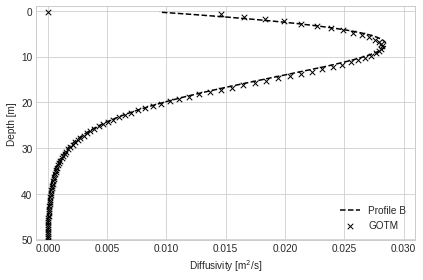

In [14]:
# Open results file
with nc.Dataset('gotm/entrainment.nc') as d:
    # Strip away superfluous size-1 dimensions
    avh = np.array(d.variables['avh'][:,:,0,0])
    # Choose first timestep and strip away superfluous size-1 dimensions
    z = np.array(np.abs(d.variables['z'][0,:,0,0]))

    # Select output timestep to use
    outputtime = 72*3600
    it = np.argmin(np.abs(d.variables['time'][:] - outputtime))

    # Plot results directly
    plt.scatter(avh[it,:], z[:], marker = 'x', s = 30, lw  = 1, c = 'k', label = 'GOTM')
    
    # plot fitted curve
    a, b, c, z0 = (0.00636, 0.088, 1.54, 1.3)
    plt.plot(f(z, a, b, c, z0), z, '--', c = 'k', lw = 1.5, alpha = 1, label = 'Profile B')

    # Set limits and labels and so on
    plt.ylim(50, -1)
    plt.xlim(-0.001,0.031)
    plt.ylabel('Depth [m]')
    plt.xlabel('Diffusivity [m$^2$/s]')
    plt.legend(loc = 'lower right')
    plt.tight_layout()
#    plt.savefig('fitted_profile.pdf')